In [9]:
import numpy as np

import xarray as xr

import clima_anom as ca

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [6]:
communities_polygon = '/mnt/Data/Github/Complex-Network-AS/mapping/communities/SA_IMERG_05x05_sync_summer_LT1Y_PL90_PEN_MM1_MLV2_TAU3_1028.shp'
communities = list(shpreader.Reader(communities_polygon).geometries())

In [3]:
data_dir = '/mnt/Data/Data/IMERG/IMERG_2001_01_2020_12_24h_05x05.nc'
DATA = xr.open_dataset(data_dir)
lat = DATA['lat']
lon = DATA['lon']
lon2d, lat2d = np.meshgrid(lon, lat)
PRE = DATA['pre']

/tmp/ipykernel_209831/443918678.py:11: RuntimeWarning: Mean of empty slice
  ax1.contourf(lon2d, lat2d, np.nanmean(PRE, axis=0), cmap=cmap)


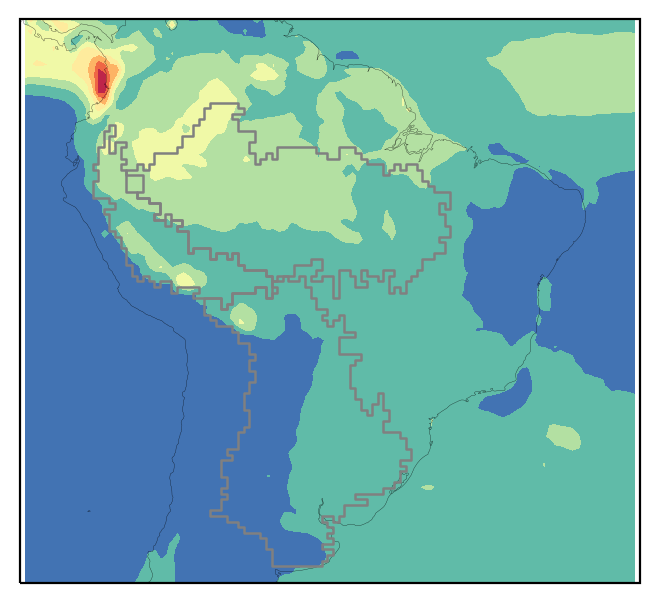

In [8]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=200)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0:3], projection = proj)
ax1.set_extent([-85,-30,-40,10],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.1,edgecolor='k',zorder=4)
ax1.add_geometries(communities,proj,edgecolor='gray',facecolor='None',linestyle='-',linewidth=0.9,zorder=5)
ax1.contourf(lon2d, lat2d, np.nanmean(PRE, axis=0), cmap=cmap)

In [12]:
COM1 = ca.extract_shapefile(communities_polygon, PRE, lat, lon, 2)

Shapes ID len:  3


/tmp/ipykernel_209831/4144544725.py:11: RuntimeWarning: Mean of empty slice
  ax1.contourf(lon2d, lat2d, np.nanmean(COM1, axis=0), cmap=cmap)


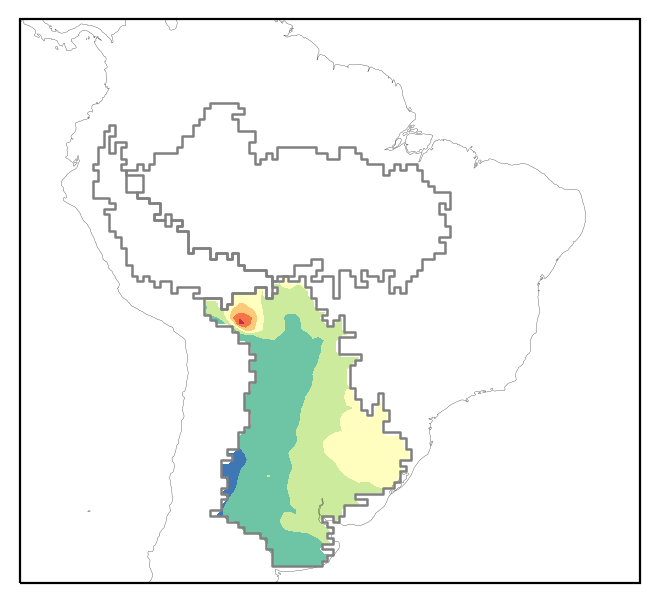

In [13]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=200)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0:3], projection = proj)
ax1.set_extent([-85,-30,-40,10],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.1,edgecolor='k',zorder=4)
ax1.add_geometries(communities,proj,edgecolor='gray',facecolor='None',linestyle='-',linewidth=0.9,zorder=5)
ax1.contourf(lon2d, lat2d, np.nanmean(COM1, axis=0), cmap=cmap)